## Final Project Submission

Please fill out:
* Student name: Carlos Marin
* Student pace: self paced / part time / full time: PART TIME
* Scheduled project review date/time: 22 JAN 2022/ 7 Feb 2022
* Instructor name: ABHINEET KULKARNI
* Blog post URL: https://www.blogger.com/blog/posts/4076241086869822975?hl=en


# Movie formula for success - Best Director, Actor, Producers
The Purpose of this project is to provide reccomendations for directors, producers, actors, and actress provide the 
best average rating and the highest return on investment. 

## Importing important packages
#### Making it easier to read file names

In [1]:


#importing data using glob
import os
from glob import glob
import pandas as pd

csv_files = glob("./zippedData/*.csv.gz")
csv_files

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")  #cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df


In [2]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [3]:
# uses t const
movie_titles = csv_files_dict['imdb_title_basics_gz']

In [4]:
# uses t const
title_ratings = csv_files_dict['imdb_title_ratings_gz']

In [5]:
#uses id, but can merge using movie
budget = csv_files_dict['tn_movie_budgets_gz']

In [6]:
#uses t const 
crew = csv_files_dict['imdb_title_crew_gz']

In [7]:
#uses n const must merge with crewmid
crewname = csv_files_dict['imdb_name_basics_gz']

In [8]:
#uses n const to merge data & t const
crewmid = csv_files_dict['imdb_title_principals_gz']

### Merging of data sets
In Order to get the main data set we will use, we have to combine all of the data sets into one large data set.
This is done by combining based on similar columns. In This first columns we combine columns by tconst, and then by nconst. Because the merge function only allows us to merge two data sets a time we do 

First we combine data sets movie_titles, and title_ratings by 'tconst', to make titleratings dataset. We also combine crew dataset and crewmid data set by 'tconst' to make crew1 dataset. By combine titleratings and crew1 dataset we get movie data set. Then we comebine the new movie dataset and crewname dataset to get movie2 dataset.

In [9]:
titleratings = pd.merge(movie_titles, title_ratings, on = 'tconst')

In [10]:
crew1 = pd.merge(crew,crewmid, on = 'tconst')

In [11]:
movie = pd.merge(titleratings, crew1, on = 'tconst')

In [12]:
movie2 = pd.merge(movie, crewname, on = 'nconst')

### Dropping and renaming columns 
First we drop the unnecessary columns. Then we rename columns. lastly we merge the new data set movie3 and the final data set budget on the 'movie' column.
Lastly, we use pd.explode on the genre column to help when filtering later on. 
A Preview of the dataset movie 5, the final data set.

In [13]:
movie3 = movie2.drop(columns=['directors', 'writers', 'ordering', 'job', 'characters', 'known_for_titles', 
                             'primary_title', 'start_year', 'runtime_minutes', 'numvotes', 'nconst'])

In [14]:
movie3.rename(columns= {'original_title' : 'movie', 'averagerating': 'average_rating'} , inplace = True )

In [15]:
movie4 = pd.merge(movie3, budget, on = 'movie')

In [16]:
movie5 = movie4.explode('genres')

In [17]:
movie5

,movie,genres,average_rating,category,primary_name,birth_year,death_year,primary_profession,release_date,production_budget,domestic_gross,worldwide_gross
0,The Last Airbender,"Action,Adventure,Family",4.1,producer,Frank Marshall,1946.0,NaN,"producer,miscellaneous,director","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
1,The Last Airbender,"Action,Adventure,Family",4.1,actor,Dev Patel,1990.0,NaN,"actor,producer,director","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
2,The Last Airbender,"Action,Adventure,Family",4.1,editor,Conrad Buff IV,1948.0,NaN,"editor,visual_effects,editorial_department","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
3,The Last Airbender,"Action,Adventure,Family",4.1,actor,Noah Ringer,1997.0,NaN,actor,"Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
4,The Last Airbender,"Action,Adventure,Family",4.1,actress,Nicola Peltz,1995.0,NaN,actress,"Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
...,...,...,...,...,...,...,...,...,...,...,...,...
24978,Never Again,Drama,5.7,actress,Kristen Carletta,NaN,NaN,actress,"Jul 12, 2002","$500,000","$307,631","$308,793"
24979,Never Again,Drama,5.7,producer,Katie Watling,NaN,NaN,"actress,producer","Jul 12, 2002","$500,000","$307,631","$308,793"
24980,Never Again,Drama,5.7,cinematographer,Michael Wooley,NaN,NaN,cinematographer,"Jul 12, 2002","$500,000","$307,631","$308,793"
24981,Heroes,Documentary,7.3,director,Köken Ergun,1976.0,NaN,"director,producer,editor","Oct 24, 2008","$400,000","$655,538","$655,538"


### UH OH we have dead inviduals in our data. 
Because we need individuals who are currently active in the movie industry, we need to remove the individuals 
who have passed away in our data set. I use the '.fillna' function and the set the data for those alive to the year 9999 (technically any year is possible as long as it is not our current year). Once we that has been set of the death year, we filter it out and set it to the future, I put 2025 as an example. That way anybody not alive in 2025 will be filtered out. Now that those have been filtered out, the death_year shows everybody as death_year as 9999. In doing so, I then filter out the death_year and birth_year as those are no longer relevant. The final dataset is labeled as movie6

In [18]:
#fill non null values for dead... they are still alive
movie5['death_year'].fillna(9999, inplace = True)

In [19]:
#Filter out those who have passed away
movie5[movie5['death_year'] >2025]

,movie,genres,average_rating,category,primary_name,birth_year,death_year,primary_profession,release_date,production_budget,domestic_gross,worldwide_gross
0,The Last Airbender,"Action,Adventure,Family",4.1,producer,Frank Marshall,1946.0,9999.0,"producer,miscellaneous,director","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
1,The Last Airbender,"Action,Adventure,Family",4.1,actor,Dev Patel,1990.0,9999.0,"actor,producer,director","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
2,The Last Airbender,"Action,Adventure,Family",4.1,editor,Conrad Buff IV,1948.0,9999.0,"editor,visual_effects,editorial_department","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
3,The Last Airbender,"Action,Adventure,Family",4.1,actor,Noah Ringer,1997.0,9999.0,actor,"Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
4,The Last Airbender,"Action,Adventure,Family",4.1,actress,Nicola Peltz,1995.0,9999.0,actress,"Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
...,...,...,...,...,...,...,...,...,...,...,...,...
24978,Never Again,Drama,5.7,actress,Kristen Carletta,NaN,9999.0,actress,"Jul 12, 2002","$500,000","$307,631","$308,793"
24979,Never Again,Drama,5.7,producer,Katie Watling,NaN,9999.0,"actress,producer","Jul 12, 2002","$500,000","$307,631","$308,793"
24980,Never Again,Drama,5.7,cinematographer,Michael Wooley,NaN,9999.0,cinematographer,"Jul 12, 2002","$500,000","$307,631","$308,793"
24981,Heroes,Documentary,7.3,director,Köken Ergun,1976.0,9999.0,"director,producer,editor","Oct 24, 2008","$400,000","$655,538","$655,538"


In [20]:
#filter out those with missing birth_year, can not guarantee they are dead nor alive.
movie5.dropna(subset=['birth_year'], inplace = True)

In [21]:
#drop birth year and death year as they are now irrelevant
movie6 = movie5.drop(columns=['birth_year','death_year'])

In [22]:
movie6

,movie,genres,average_rating,category,primary_name,primary_profession,release_date,production_budget,domestic_gross,worldwide_gross
0,The Last Airbender,"Action,Adventure,Family",4.1,producer,Frank Marshall,"producer,miscellaneous,director","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
1,The Last Airbender,"Action,Adventure,Family",4.1,actor,Dev Patel,"actor,producer,director","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
2,The Last Airbender,"Action,Adventure,Family",4.1,editor,Conrad Buff IV,"editor,visual_effects,editorial_department","Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
3,The Last Airbender,"Action,Adventure,Family",4.1,actor,Noah Ringer,actor,"Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
4,The Last Airbender,"Action,Adventure,Family",4.1,actress,Nicola Peltz,actress,"Jul 1, 2010","$150,000,000","$131,772,187","$319,713,881"
...,...,...,...,...,...,...,...,...,...,...
24933,The Art of War,War,2.8,actor,Matthew Starks,actor,"Aug 25, 2000","$40,000,000","$30,199,105","$30,199,105"
24934,Nomad,Drama,3.1,actor,Alex Alessi,"actor,writer,editor","Mar 16, 2007","$40,000,000","$79,123","$79,123"
24947,Nothing,Drama,7.4,director,Marco Romano,"director,writer,producer","Dec 31, 2003","$4,000,000",$0,"$63,180"
24949,Molly,"Action,Sci-Fi",4.6,actress,Julia Batelaan,actress,"Oct 22, 1999","$21,000,000","$17,396","$17,396"


### Converting the money to integers and ROI
The Python system, does not read money. Therefore our first lines of code convert the numbers to integers. for the production_budget, domestic_gross, and worldwide_gross columns. Then we create a new column which returns Return on Investment percentage named ROI_Percentage. This column is calculates the return on investment based on this formula      
#### ROI % =  (Retuns/Investment) * 100  
#### ROI % = (worldwide_gross/ Production_budget) * 100

The ROI Percentage will provide a number a percentage. if the percentage is less than 100 then there is loss , if the number is greater than 100 than there is profit. Thus we filter out those films that made profit by filtering for ROI Percentage greater than 100. 

In [23]:
movie6["production_budget"] = movie6["production_budget"].replace('[\$\,\.]',"",regex=True).astype(int)

In [24]:
movie6["domestic_gross"] = movie6["domestic_gross"].replace('[\$\,\.]',"",regex=True).astype(int)

In [25]:
movie6["worldwide_gross"] = movie6["worldwide_gross"].replace('[\$\,\.]',"",regex=True).astype(int)

In [26]:
#ROI Forumula  
# ROI % =  (Retuns/Investment) * 100  
# ROI % = (worldwide_gross/ Production_budget) * 100
movie6["ROI_Percentage"] = (movie6["worldwide_gross"]/movie6["production_budget"])*100

In [27]:
#Removes films and associated crew that did not break even in ROI Percentage
movie7 = movie6[movie6['ROI_Percentage'] >100]

In [28]:
movie7

,movie,genres,average_rating,category,primary_name,primary_profession,release_date,production_budget,domestic_gross,worldwide_gross,ROI_Percentage
0,The Last Airbender,"Action,Adventure,Family",4.1,producer,Frank Marshall,"producer,miscellaneous,director","Jul 1, 2010",150000000,131772187,319713881,213.142587
1,The Last Airbender,"Action,Adventure,Family",4.1,actor,Dev Patel,"actor,producer,director","Jul 1, 2010",150000000,131772187,319713881,213.142587
2,The Last Airbender,"Action,Adventure,Family",4.1,editor,Conrad Buff IV,"editor,visual_effects,editorial_department","Jul 1, 2010",150000000,131772187,319713881,213.142587
3,The Last Airbender,"Action,Adventure,Family",4.1,actor,Noah Ringer,actor,"Jul 1, 2010",150000000,131772187,319713881,213.142587
4,The Last Airbender,"Action,Adventure,Family",4.1,actress,Nicola Peltz,actress,"Jul 1, 2010",150000000,131772187,319713881,213.142587
...,...,...,...,...,...,...,...,...,...,...,...
24722,The Patriot,Documentary,7.3,editor,Yosef Grunfeld,"editor,editorial_department,writer","Jun 28, 2000",110000000,113330342,215300000,195.727273
24908,Panic Room,"Action,Drama,Mystery",4.4,actor,Brock Brazda,"actor,producer,cinematographer","Mar 29, 2002",48000000,95308367,196308367,408.975765
24909,Panic Room,"Action,Drama,Mystery",4.4,director,G.M. Whiting,"writer,director,editor","Mar 29, 2002",48000000,95308367,196308367,408.975765
24916,21,Horror,7.2,director,Jaishankar Chigurula,"director,writer,editor","Mar 28, 2008",35000000,81159365,159846429,456.704083


## Time To Filter out  for specific roles
We need the best directors, actors, actresses, and producers. Therefore first I create seperate data sets that contain that only role from the 'category' column. Then using value_counts we use the most 10 most listed names. Using the 10 listed names, we create a list which contains the names and insert to filter and contain the names listed.

In [29]:
director = movie7.set_index('category').filter(regex='director', axis = 0)

In [30]:
actor = movie7.set_index('category').filter(regex='actor', axis = 0)

In [31]:
actress = movie7.set_index('category').filter(regex='actress', axis = 0)

In [32]:
producer = movie7.set_index('category').filter(regex='producer', axis = 0)

In [33]:
director['primary_name'].value_counts().head(10)

Tim Story             7
Steven Spielberg      7
Ridley Scott          6
Clint Eastwood        6
Steven Soderbergh     6
Brad Peyton           5
Francis Lawrence      5
Antoine Fuqua         5
Jaume Collet-Serra    5
Paul W.S. Anderson    5
Name: primary_name, dtype: int64

In [34]:
actor['primary_name'].value_counts().head(10)

Dwayne Johnson    17
Liam Neeson       16
Kevin Hart        15
Mark Wahlberg     15
Channing Tatum    15
Steve Carell      12
Owen Wilson       12
Joel Edgerton     12
Robert De Niro    11
Bradley Cooper    11
Name: primary_name, dtype: int64

In [35]:
actress['primary_name'].value_counts().head(10)

Jennifer Lawrence     13
Emily Blunt           12
Amy Adams             12
Anna Kendrick         11
Cate Blanchett        11
Anne Hathaway         10
Rooney Mara           10
Kristen Wiig          10
Chloë Grace Moretz    10
Rachel McAdams        10
Name: primary_name, dtype: int64

In [36]:
producer['primary_name'].value_counts().head(10)

Jason Blum                37
Tim Bevan                 17
Eric Fellner              16
Peter Chernin             14
Lorenzo di Bonaventura    13
Michael Bay               12
Scott Rudin               12
Marc Platt                10
Michael De Luca           10
Beau Flynn                 9
Name: primary_name, dtype: int64

In [37]:
#create director list for easier filtering
director_list10 = ['Antoine Fuqua', 'Brad Peyton', 'David Gordon Green','Francis Lawrence','Ridley Scott',
                  'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tim Story', 'Zack Snyder']

In [38]:
director_list = sorted(director_list10)

In [39]:
actor_list10 = ['Dwayne Johnson','Liam Neeson','Mark Wahlberg','Kevin Hart','Channing Tatum',    
'Steve Carell','Joel Edgerton','Owen Wilson','Jonah Hill','Tom Hardy']

In [41]:
#Sort List Name alphabetically
actor_list= sorted(actor_list10)

In [42]:
actress_list10 = ['Jennifer Lawrence','Amy Adams','Emily Blunt','Anna Kendrick','Cate Blanchett',        
'Emma Stone','Scarlett Johansson','Chloë Grace Moretz','Kristen Wiig', 'Rachel McAdams']

In [43]:
#sort Actress List name alphabetically
actress_list = sorted(actress_list10)

In [44]:
producer_list10 = ['Jason Blum', 'Tim Bevan', 'Eric Fellner','Peter Chernin','Lorenzo di Bonaventura',
                  'Michael Bay', 'Scott Rudin', 'Michael De Luca', 'Marc Platt', 'Peter Safran']

In [45]:
#sort Producer List Alphabetically
producer_list = sorted(producer_list10)

In [46]:

Director1 = director[director.primary_name.isin(director_list)]

In [47]:
actor1 = actor[actor.primary_name.isin(actor_list)]

In [48]:
actress1 = actress[actress.primary_name.isin(actress_list)]

In [49]:
producer1 = producer[producer.primary_name.isin(producer_list)]

### Basics stats for all columns and all people

In [50]:
movie6.groupby(['primary_name']).agg(['mean', 'median', 'count'])

average_rating              production_budget  \
                                mean median count              mean   
primary_name                                                          
50 Cent                         6.70    6.7     3      3.973333e+07   
A. Scott Berg                   6.60    6.6     1      1.700000e+07   
A.A. Milne                      7.30    7.3     1      7.500000e+07   
A.J. Buckley                    5.80    5.8     1      2.500000e+06   
A.R. Rahman                     7.24    7.1     5      1.404000e+07   
...                              ...    ...   ...               ...   
Éric Serra                      5.90    5.9     2      5.875000e+07   
Éric Toledano                   6.70    6.7     1      3.750000e+07   
Ólafur Darri Ólafsson           6.00    6.0     1      8.000000e+07   
Óscar Jaenada                   6.30    6.3     1      1.300000e+07   
Óskar Jónasson                  6.50    6.5     1      2.500000e+07   

                                        domestic_gross                     \
                           median count           mean       median count   
primary_name                                                                
50 Cent                30000000.0     3   2.336120e+07   25135965.0     3   
A. Scott Berg          17000000.0     1   1.361045e+06    1361045.0     1   
A.A. Milne             75000000.0     1   9.921504e+07   99215042.0     1   
A.J. Buckley            2500000.0     1   0.000000e+00          0.0     1   
A.R. Rahman            16000000.0     5   1.405250e+07   12431792.0     5   
...                           ...   ...            ...          ...   ...   
Éric Serra             58750000.0     2   6.328698e+07   63286980.0     2   
Éric Toledano          37500000.0     1   1.082355e+08  108235497.0     1   
Ólafur Darri Ólafsson  80000000.0     1   2.736766e+07   27367660.0     1   
Óscar Jaenada          13000000.0     1   5.512162e+07   55121623.0     1   
Óskar Jónasson         25000000.0     1   6.652800e+07   66528000.0     1   

                      worldwide_gross                    ROI_Percentage  \
                                 mean       median count           mean   
primary_name                                                              
50 Cent                  6.316161e+07   80131391.0     3     148.185492   
A. Scott Berg            7.265283e+06    7265283.0     1      42.736959   
A.A. Milne               1.975048e+08  197504758.0     1     263.339677   
A.J. Buckley             0.000000e+00          0.0     1       0.000000   
A.R. Rahman              2.357184e+07   12617472.0     5     126.677324   
...                               ...          ...   ...            ...   
Éric Serra               2.295147e+08  229514724.0     2     572.866444   
Éric Toledano            1.190245e+08  119024536.0     1     317.398763   
Ólafur Darri Ólafsson    1.308189e+08  130818912.0     1     163.523640   
Óscar Jaenada            1.187634e+08  118763442.0     1     913.564938   
Óskar Jónasson           9.840686e+07   98406855.0     1     393.627420   

                                         
                           median count  
primary_name                             
50 Cent                148.194236     3  
A. Scott Berg           42.736959     1  
A.A. Milne             263.339677     1  
A.J. Buckley             0.000000     1  
A.R. Rahman             78.859200     5  
...                           ...   ...  
Éric Serra             572.866444     2  
Éric Toledano          317.398763     1  
Ólafur Darri Ólafsson  163.523640     1  
Óscar Jaenada          913.564938     1  
Óskar Jónasson         393.627420     1  

[6586 rows x 15 columns]

### Data Visualization, comparison of ROI Percentage and and Average rating
Once we have the final data sets for the top actors, actresses, directors, and producers. First descriptive statistics of ROI Percentage and average rating for directors, actors, actresses, and producers is provided. Next step is to group them using .groupby, that way all the numerical data is collected and listed by the person rather than the movie.
Once the data is grouped, the primary_name column does no longer function. Therefore we create a new column, using the listed made earlier to create a new column. The new column data will match the name of the person which will serve function when it comes to plotting data.


In [51]:
Director1['ROI_Percentage'].describe()

count       55.000000
mean       821.348810
std       2883.587569
min        119.677852
25%        209.801690
50%        296.888675
75%        417.656615
max      21538.461538
Name: ROI_Percentage, dtype: float64

In [52]:
Director1['ROI_Percentage'].describe()

count       55.000000
mean       821.348810
std       2883.587569
min        119.677852
25%        209.801690
50%        296.888675
75%        417.656615
max      21538.461538
Name: ROI_Percentage, dtype: float64

In [53]:
actor1['average_rating'].describe()

count    136.000000
mean       6.569118
std        0.724647
min        4.200000
25%        6.100000
50%        6.500000
75%        7.100000
max        8.400000
Name: average_rating, dtype: float64

In [54]:
actor1['ROI_Percentage'].describe()

count     136.000000
mean      399.351120
std       335.839229
min       101.666212
25%       194.564713
50%       303.325287
75%       436.696620
max      2436.425043
Name: ROI_Percentage, dtype: float64

In [55]:
producer1['average_rating'].describe()

count    150.000000
mean       6.447333
std        0.989047
min        3.400000
25%        5.900000
50%        6.450000
75%        7.175000
max        8.500000
Name: average_rating, dtype: float64

In [56]:
producer1['ROI_Percentage'].describe()

count      150.000000
mean      1170.710162
std       3539.457290
min        100.482200
25%        243.174212
50%        456.074107
75%       1019.948476
max      41656.474000
Name: ROI_Percentage, dtype: float64

In [57]:
actress['average_rating'].describe()

count    1829.000000
mean        6.359595
std         1.021156
min         1.700000
25%         5.800000
50%         6.400000
75%         7.100000
max         8.800000
Name: average_rating, dtype: float64

In [58]:
actress1['ROI_Percentage'].describe()

count     109.000000
mean      592.798635
std       924.203892
min       100.026547
25%       234.221785
50%       382.405208
75%       644.695735
max      9089.359138
Name: ROI_Percentage, dtype: float64

In [59]:
import matplotlib
import matplotlib.pyplot as plt

In [62]:
Director = Director1.groupby(['primary_name']).agg(['mean'])

In [63]:
Director['Director_name'] = director_list10

In [64]:
Director.sort_values(by= ['Director_name'], inplace = True)

In [65]:
Director

,average_rating,production_budget,domestic_gross,worldwide_gross,ROI_Percentage,Director_name
,mean,mean,mean,mean,mean,
primary_name,,,,,,
Antoine Fuqua,6.940000,6.440000e+07,8.967946e+07,1.625835e+08,267.896770,Antoine Fuqua
Brad Peyton,5.520000,7.980000e+07,8.169298e+07,2.649717e+08,298.920731,Brad Peyton
David Gordon Green,6.375000,1.258125e+07,7.378844e+07,1.102911e+08,6189.807124,David Gordon Green
Francis Lawrence,6.840000,1.044000e+08,2.298224e+08,5.086383e+08,440.615678,Francis Lawrence
Ridley Scott,6.550000,1.175000e+08,1.027747e+08,3.263373e+08,300.638682,Ridley Scott
Steven Soderbergh,6.500000,2.508333e+07,4.599392e+07,7.828790e+07,691.433308,Steven Soderbergh
Steven Spielberg,7.228571,9.214286e+07,9.815347e+07,2.750485e+08,318.112054,Steven Spielberg
Tim Burton,6.660000,1.138000e+08,1.155143e+08,3.434334e+08,271.149755,Tim Burton


Text(0.5, 0, 'Director Name')

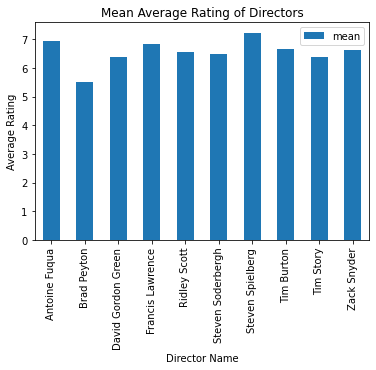

In [66]:
ax = Director.plot.bar(x = 'Director_name', y = 'average_rating', title = 'Mean Average Rating of Directors')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Director Name')

Text(0.5, 0, 'Director Name')

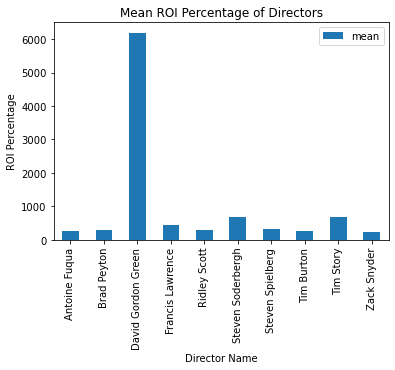

In [67]:
ax = Director.plot.bar(x = 'Director_name', y = 'ROI_Percentage', title = 'Mean ROI Percentage of Directors')
ax.set_ylabel('ROI Percentage')
ax.set_xlabel('Director Name')

In [68]:
Actor = actor1.groupby(['primary_name']).agg(['mean'])

In [69]:
Actor['Actor_name'] = actor_list

In [70]:
Actor

,average_rating,production_budget,domestic_gross,worldwide_gross,ROI_Percentage,Actor_name
,mean,mean,mean,mean,mean,
primary_name,,,,,,
Channing Tatum,6.506667,6.370000e+07,8.474052e+07,1.867546e+08,503.684415,Channing Tatum
Dwayne Johnson,6.264706,9.305882e+07,1.278503e+08,3.837691e+08,387.767712,Dwayne Johnson
Joel Edgerton,6.900000,4.872500e+07,4.766231e+07,1.020652e+08,325.275554,Joel Edgerton
Jonah Hill,6.790909,5.163636e+07,8.593745e+07,1.629256e+08,324.678713,Jonah Hill
Kevin Hart,6.306667,3.923333e+07,1.222729e+08,2.170332e+08,481.261438,Kevin Hart
Liam Neeson,6.350000,6.662500e+07,6.636388e+07,1.851415e+08,323.601148,Liam Neeson
Mark Wahlberg,6.593333,6.740000e+07,9.822993e+07,2.448132e+08,392.113445,Mark Wahlberg
Owen Wilson,6.183333,7.816667e+07,8.592025e+07,2.128778e+08,399.243928,Owen Wilson


Text(0.5, 0, 'Actor Name')

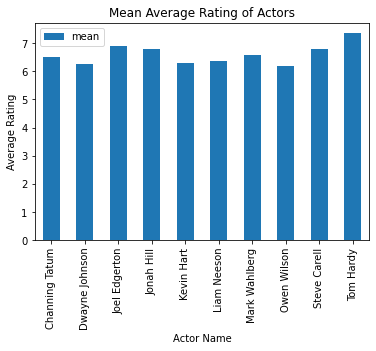

In [71]:
ax = Actor.plot.bar(x = 'Actor_name', y = 'average_rating', title = 'Mean Average Rating of Actors')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Actor Name')

Text(0.5, 0, 'Actor Name')

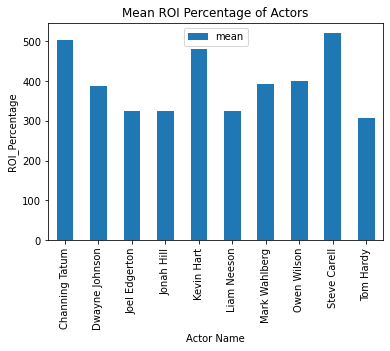

In [72]:
ax = Actor.plot.bar(x = 'Actor_name', y = 'ROI_Percentage', title = 'Mean ROI Percentage of Actors')
ax.set_ylabel('ROI_Percentage')
ax.set_xlabel('Actor Name')

In [73]:
Actress = actress1.groupby(['primary_name']).agg(['mean'])

In [74]:
Actress['Actress_name'] = actress_list

In [75]:
Actress

,average_rating,production_budget,domestic_gross,worldwide_gross,ROI_Percentage,Actress_name
,mean,mean,mean,mean,mean,
primary_name,,,,,,
Amy Adams,7.241667,6.583333e+07,9.958572e+07,2.123975e+08,358.754767,Amy Adams
Anna Kendrick,6.763636,4.074545e+07,8.670410e+07,1.527457e+08,447.549227,Anna Kendrick
Cate Blanchett,7.136364,1.037909e+08,1.330926e+08,4.015279e+08,1169.100043,Cate Blanchett
Chloë Grace Moretz,6.550000,4.268000e+07,4.662708e+07,9.686207e+07,419.433081,Chloë Grace Moretz
Emily Blunt,6.658333,6.146000e+07,7.964813e+07,1.833365e+08,620.330002,Emily Blunt
Emma Stone,6.680000,7.430000e+07,1.154115e+08,3.074902e+08,635.260075,Emma Stone
Jennifer Lawrence,6.884615,7.555000e+07,1.641593e+08,3.544978e+08,630.676932,Jennifer Lawrence
Kristen Wiig,6.610000,5.785000e+07,1.563567e+08,3.816352e+08,694.787581,Kristen Wiig


Text(0.5, 0, 'Actress Name')

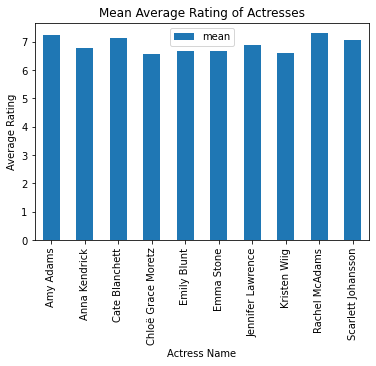

In [76]:
ax = Actress.plot.bar(x = 'Actress_name', y = 'average_rating', title = 'Mean Average Rating of Actresses')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Actress Name')

Text(0.5, 0, 'Actress Name')

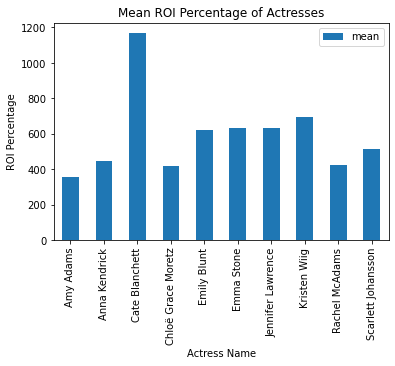

In [77]:
ax = Actress.plot.bar(x = 'Actress_name', y = 'ROI_Percentage', title = 'Mean ROI Percentage of Actresses')
ax.set_ylabel('ROI Percentage')
ax.set_xlabel('Actress Name')

In [78]:
Producer = producer1.groupby(['primary_name']).agg(['mean'])

In [79]:
Producer['Producer_name'] = producer_list

In [80]:
Producer

,average_rating,production_budget,domestic_gross,worldwide_gross,ROI_Percentage,Producer_name
,mean,mean,mean,mean,mean,
primary_name,,,,,,
Eric Fellner,6.987500,2.862500e+07,3.337742e+07,9.824282e+07,386.950280,Eric Fellner
Jason Blum,6.048649,6.103135e+06,5.214397e+07,9.667490e+07,3103.735405,Jason Blum
Lorenzo di Bonaventura,6.292308,8.280769e+07,9.811190e+07,3.076001e+08,317.405505,Lorenzo di Bonaventura
Marc Platt,6.660000,4.072000e+07,7.367988e+07,1.546694e+08,470.006541,Marc Platt
Michael Bay,5.933333,2.931667e+07,7.323056e+07,1.553547e+08,1177.159259,Michael Bay
Michael De Luca,6.040000,4.800000e+07,7.946833e+07,2.264284e+08,472.716971,Michael De Luca
Peter Chernin,6.807143,7.297143e+07,1.043359e+08,2.535747e+08,373.960241,Peter Chernin
Peter Safran,5.966667,2.216529e+07,6.549297e+07,1.626798e+08,1131.039274,Peter Safran


Text(0.5, 0, 'Producer Name')

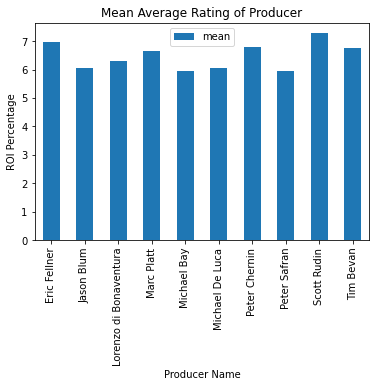

In [81]:
ax = Producer.plot.bar(x = 'Producer_name', y = 'average_rating', title = 'Mean Average Rating of Producer')
ax.set_ylabel('ROI Percentage')
ax.set_xlabel('Producer Name')

Text(0.5, 0, 'Producer Name')

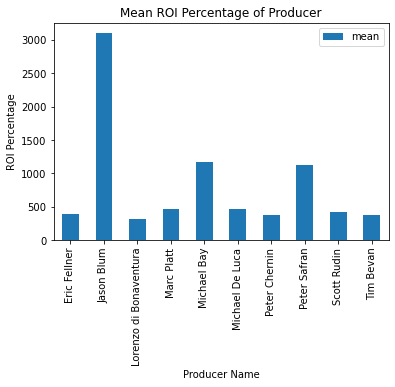

In [82]:
ax = Producer.plot.bar(x = 'Producer_name', y = 'ROI_Percentage', title = 'Mean ROI Percentage of Producer')
ax.set_ylabel('ROI Percentage')
ax.set_xlabel('Producer Name')

### Results/Conclusions

-1) David Gordon Green is the highest ROI director, His success in movies vary from dark comedies movies like Pineapple Express and shows like "Eastbound and Down' to slasher films such as Halloween.
he has great variety under his belt. 

-2) Top 3 Actors are Channing Tatum, Kevin Hart, and Steve Carell. Kevin Hart and Steve Carell are largely known for their comedies. Channing Tatums is a bit of wildcard he has played in action movies such as White House Down, and GI Joe, he has also played in comedies suchw as 21/22 Jump Street Films and Dramas such as Dear John and Coach Carter.

-3) Jason Blum, he is the best Producer for thrillers and horrors. He is well known for his work in movies such as paranormal activity, Halloween, The Purge. He worked with David Gordon Green for the Halloween movies.

-4) Cate Blanchett, is another jack of all trades for an actress. She has played Dramas such as the Curious Case of Benjamin Button, to Comedies like Don't Look Up, and Fantasy like The Hobbit/Lord of the Rings.

### Next Steps.
 -1) Provide Genre Specific data. For Example, best Action Director, Action Producer, Action Actors and Actresses.

-2) Does Streaming vs Box Office affect movie success.. we live in a time where movies are now released via streaming platforms. Compare success of movies released via streaming platforms independently from box office.

-3) Include different measure of success... i.e., popularity. How often is this movie viewed? or Box Office success on a week-by-week basis is another measure of popularity.
